# TD de classification - Partie 3 - Données non linéairement séparables

**Objectif de ce Notebook :**

L'objectif de ce notebook est d'entrainer un modèle sur des **données non linéairement séparables**.

**Mots-clés :**

- **SVM** : Machine à Vecteurs de Support
- **Vecteur de support**
- **Matrice de confusion**
- **Jeu de données d'entraînement**
- **Jeu de données de test**
- **Justesse (accuracy)**
- **Précision**
- **Rappel**
- **Validation croisée** 

**Ressources :**

- [Machine à vecteurs de support (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [Séparation entre jeu de données d'entrainement et de test](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Matrice de confusion](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
- [Métriques de classification](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
- [Validation croisée](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
- [Recherche par grille](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
___

▶️ Importer les **bibliothèques** nécessaires à l'activité

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC

▶️ Exécuter le code de la **fonction d'affichage des graphiques**

In [46]:
def afficher_graphique(
    X, y, svm=None
):
    plt.figure(figsize=(4, 4))
    if svm is not None:
        # Créer un maillage pour tracer la courbe de décision
        h = .02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Prédire les classes pour chaque point du maillage
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm.reversed())
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe 1')
    plt.title('Jeu de données en cercles concentriques')
    plt.xlabel('Caractéristique 1')
    plt.ylabel('Caractéristique 2')
    plt.legend()
    plt.show()

▶️ **Importer et afficher les données** à classifier

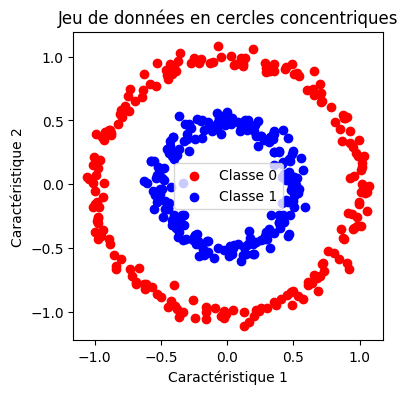

In [47]:
# Création du jeu de données
data = pd.read_csv('data_class_3.csv')
X = data.iloc[:, :2].to_numpy()
y = data.iloc[:, 2].to_numpy()
afficher_graphique(X, y)

## 💻 Code à compléter

**Objectif :**

Entrainer un modèle de SVM pour **classifier les données non linéairement séparables**.

**Etapes :**

- Entrainer un modèle de SVM avec un **noyau linéaire** 
- Entrainer un modèle de SVM avec des **noyaux polynomiaux** d'ordre 2, 3 et 4. Analyser le fonctionnement de ce noyau
- Entrainer un modèle de SVM avec des **noyaux rbf et sigmoid**. Analyser le fonctionnement de ces noyaux

**Ressources à utiliser :**

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

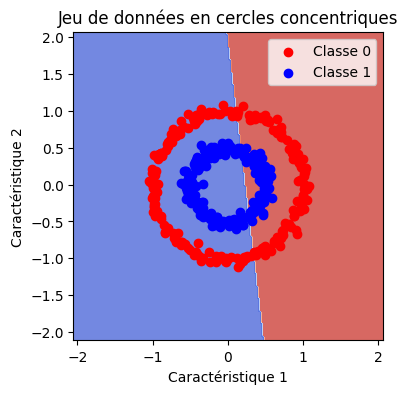

In [48]:
model = SVC(kernel='linear')
model.fit(X, y)
afficher_graphique(X, y, model)

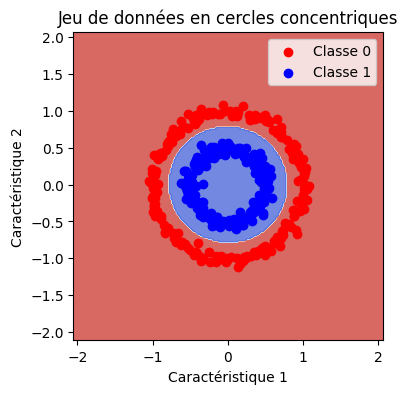

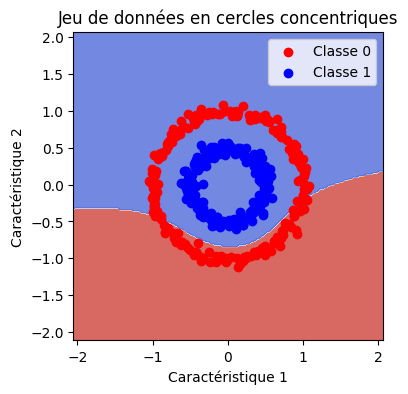

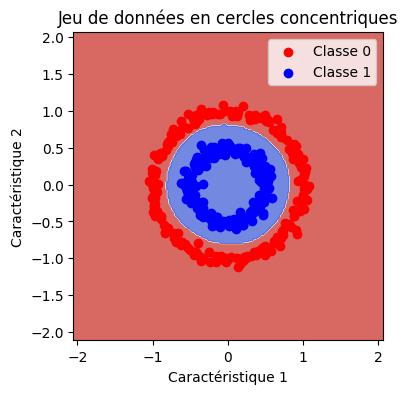

In [49]:
for degree in range(2, 5):
    model = SVC(kernel='poly', degree=degree)
    model.fit(X, y)
    afficher_graphique(X, y, model)

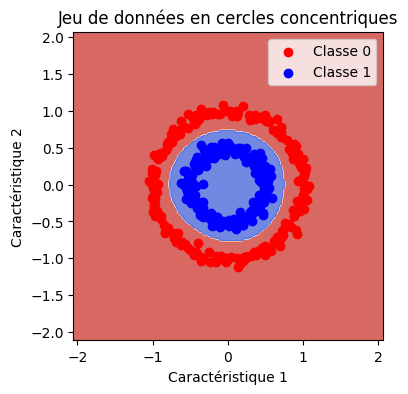

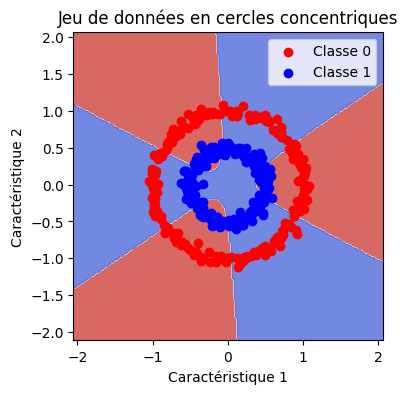

In [44]:
for kernel in ["rbf", "sigmoid"]:
    model = SVC(kernel=kernel)
    model.fit(X, y)
    afficher_graphique(X, y, model)